# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** Fiqih Hidayaturrahman
- **Email:** fiqihhidayaturrahman@gmail.com
- **ID Dicoding:** Fiqih Hidayaturrahman

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan dari waktu ke waktu? Apakah terdapat tren musiman?
    - Tujuan: Analisis ini bisa menjelaskan tren aktivitas E-commerce dalam rentang waktu, apakah ada peningkatan saat tertentu, dan seberapa stabil penjualannya.
2. Bagaimana performa penjualan berdasarkan lokasi Geografis?
    - Tujuan: Mengetahui kota mana yang memberikan revenue dan order paling banyak.
3. Kategori produk apa yang paling laris dan menghasilkan revenue paling besar?
    - Tujuan: Mengetahui kategori apa yang paling banyak terjual dan paling menguntungkan.

## Import Semua Packages/Library yang Digunakan

In [511]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

from folium.plugins import MarkerCluster
from matplotlib.ticker import ScalarFormatter

In [512]:
# Untuk dashboard interaktif (Streamlit digunakan nanti)
import streamlit as st

In [513]:
# Pengaturan visualisasi
sns.set(style="whitegrid")

# color palette
palette = sns.color_palette("dark:#5A9_r", as_cmap=True)


## Data Wrangling

### Gathering Data
Pada bagian ini, seluruh file data dalam format CSV akan dimuat. Dataset ini terdiri dari 9 file, masing-masing berisi informasi terkait pelanggan, penjual, produk, pesanan, pembayaran, lokasi, dan ulasan.

In [562]:
# Load semua file CSV ke dalam DataFrame
customers_df = pd.read_csv(".data\customers_dataset.csv")
geolocation_df = pd.read_csv(".data\geolocation_dataset.csv")
order_items_df = pd.read_csv(".data\order_items_dataset.csv")
order_payments_df = pd.read_csv(".data\order_payments_dataset.csv")
order_reviews_df = pd.read_csv(".data\order_reviews_dataset.csv")
orders_df = pd.read_csv(".data\orders_dataset.csv")
product_cat_translation_df = pd.read_csv(".data\product_category_name_translation.csv")
products_df = pd.read_csv(".data\products_dataset.csv")
sellers_df = pd.read_csv(".data\sellers_dataset.csv")

### Assessing Data

In [515]:
# list DataFrame dan nama file untuk loop
dataframes = {
    "customers": customers_df,
    "geolocation": geolocation_df,
    "order_items": order_items_df,
    "order_payments": order_payments_df,
    "order_reviews": order_reviews_df,
    "orders": orders_df,
    "product_cat_translation": product_cat_translation_df,
    "products": products_df,
    "sellers": sellers_df
}

# Fungsi untuk menilai data
for name, df in dataframes.items():
    print(f"========== {name.upper()} DATAFRAME ==========")
    print("Shape:", df.shape)
    print("Info:")
    print(df.info())
    print("\nMissing values:\n", df.isnull().sum())
    print("\nDuplicated rows:", df.duplicated().sum())
    print("-" * 50)

========== CUSTOMERS DATAFRAME ==========
Shape: (99441, 5)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Missing values:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Duplicated rows: 0
--------------------------------------------------
========== GEOLOCATION DATAFRAME ==========
Shape: (1000163, 5)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to

Setelah semua data dimuat, langkah selanjutnya adalah menilai kualitas dan struktur data. Proses ini dilakukan untuk:
- Mengetahui jumlah baris dan kolom
- Mengevaluasi tipe data di setiap kolom
- Mengidentifikasi nilai yang hilang
- Mendeteksi data yang duplikat

Penilaian ini penting untuk menentukan langkah pembersihan data (cleaning) yang tepat sebelum dilakukan analisis lebih lanjut.

**Evaluasi**
- **customers:** tidak terdapat masalah
- **geolocation:** terdapat 261.831 duplikat (mungkin customer dengan alamat yang sama, berada dalam satu rumah atau bangunan yang sama)
- **order_items:** tidak ada masalah
- **order_payments:** tidak ada masalah
- **order_reviews:** missing value pada "review_comment_title" dan "review_comment_massage" (mungkin customer yang tidak memberikan ulasan produk. akan diisi dengan NaN saat cleaning data)
- **orders:** missing value pada "order_approved_at", "order_deliverd_carrier_date", "order_delivered_costumer_date" (akan dihapus saat cleaning data)
- **product_category_name_translation:** tidak ada masalah
- **products:** missing value pada "product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty" dan 2 missing value pada dimensi produk (akan dihapus saat cleaning data)
- **sellers:** tidak ada masalah

### Cleaning Data

In [516]:
# Missing Value
# order_review_df missing value isi dengan NaN
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('NaN')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('NaN')

# orders_df hapus misisng value
orders_df_clean = orders_df.dropna().copy()

# products_df hapus missing value
products_df_clean = products_df.dropna().copy()

In [517]:
print("order_reviews_df shape:", order_reviews_df.shape)
print("orders_df shape:", orders_df.shape)
print("products_df shape:", products_df.shape)
print("orders_df_clean shape:", orders_df_clean.shape)
print("products_df_clean shape:", products_df_clean.shape)

order_reviews_df shape: (99224, 7)
orders_df shape: (99441, 8)
products_df shape: (32951, 9)
orders_df_clean shape: (96461, 8)
products_df_clean shape: (32340, 9)


**Evaluasi**
1. order_review_df: missing value diisi dengan "NaN" karena diasumsikan customer tidak memberikan review
2. order_df: missing value dihapus 
3. products_df: missing value dihapus

## Exploratory Data Analysis (EDA)

### Explore

##### a. Grouping Data untuk melihat penujualan dan revenue

In [518]:
# Pastikan kolom tanggal dalam format datetime
orders_df_clean['order_purchase_timestamp'] = pd.to_datetime(orders_df_clean['order_purchase_timestamp'])

# Gabungkan orders dan order_items
orders_items_merged = pd.merge(orders_df_clean, order_items_df, on='order_id')

# Buat kolom bulan-tahun
orders_items_merged['purchase_month'] = orders_items_merged['order_purchase_timestamp'].dt.to_period('M')

# Agregasi penjualan bulanan
monthly_sales = orders_items_merged.groupby('purchase_month').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('price', 'sum')
).reset_index()

# Ubah kembali period ke datetime untuk plotting
monthly_sales['purchase_month'] = monthly_sales['purchase_month'].dt.to_timestamp()

##### b. Grouping Data untuk melihat wilayah penjualan

In [519]:
# Gabungkan orders dengan order_items
orders_items_merged = pd.merge(orders_df_clean, order_items_df, on='order_id')

# Gabungkan dengan customers untuk ambil informasi wilayah
orders_items_customers = pd.merge(orders_items_merged, customers_df, on='customer_id')

# Agregasi Berdasarkan customer_state
regional_sales = orders_items_customers.groupby('customer_state').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('price', 'sum')
).reset_index().sort_values(by='total_revenue', ascending=False)

In [520]:
# Gabungkan orders dengan customers untuk dapatkan informasi kota
orders_customers = pd.merge(orders_df_clean, customers_df, on='customer_id')

# Gabungkan dengan order_items untuk dapatkan data penjualan per order
city_sales_df = pd.merge(orders_customers, order_items_df, on='order_id')

# Tampilkan beberapa kolom penting
city_sales_df[['customer_city', 'order_id', 'price']].head()

city_performance = city_sales_df.groupby('customer_city').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('price', 'sum')
).reset_index()

# Urutkan dari yang tertinggi
city_performance = city_performance.sort_values(by='total_revenue', ascending=False)

##### c. Grouping Data untuk melihat penjulan tiap kategori produk

In [521]:
# Gabung products dengan order_items
product_sales_df = pd.merge(order_items_df, products_df, on='product_id', how='left')

# Gabung dengan data kategori terjemahan (jika ingin hasil dalam Bahasa Inggris)
product_sales_df = pd.merge(product_sales_df, product_cat_translation_df, on='product_category_name', how='left')

# Gabung dengan order yang valid saja
product_sales_df = pd.merge(product_sales_df, orders_df_clean[['order_id']], on='order_id', how='inner')

# Hitung Total Order dan Revenue per Kategori
category_perf = product_sales_df.groupby('product_category_name_english').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('price', 'sum')
).sort_values(by='total_orders', ascending=False).reset_index()

##### d. Distribusi Jumlah Order dan Revenue

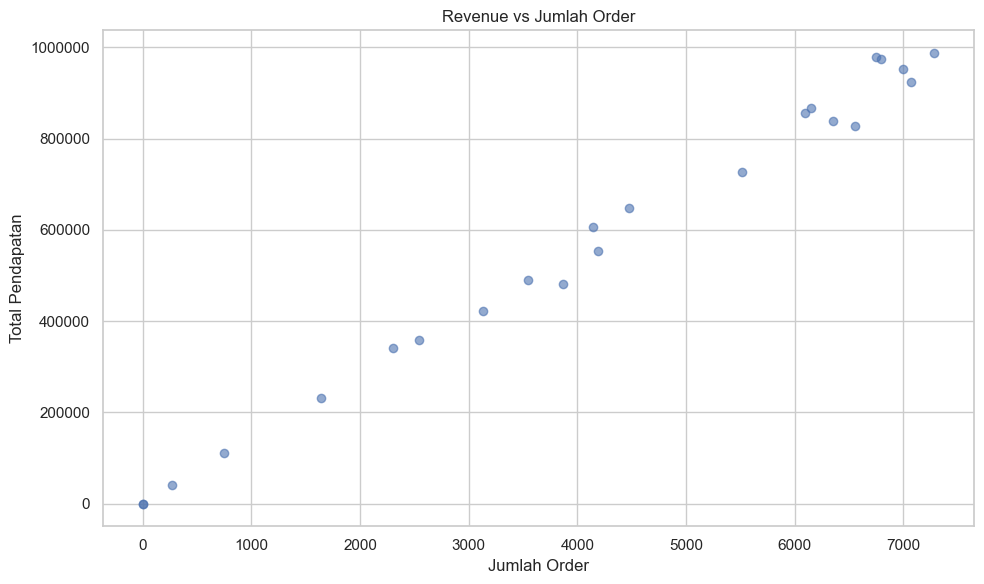

,purchase_month,total_orders,total_revenue
0,2016-09-01,1,134.97
1,2016-10-01,270,40941.30
2,2016-12-01,1,10.90
3,2017-01-01,748,111712.47
4,2017-02-01,1641,232638.86
5,2017-03-01,2546,359198.85
6,2017-04-01,2303,340669.68
7,2017-05-01,3545,489159.25
8,2017-06-01,3135,421923.37
9,2017-07-01,3872,481604.52


In [522]:
plt.figure(figsize=(10, 6))
plt.scatter(monthly_sales['total_orders'], monthly_sales['total_revenue'], alpha=0.6)
plt.title('Revenue vs Jumlah Order')
plt.xlabel('Jumlah Order')
plt.ylabel('Total Pendapatan')
plt.grid(True)

# Menonaktifkan scientific notation di sumbu Y
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

display(monthly_sales)

##### e. Status Order

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

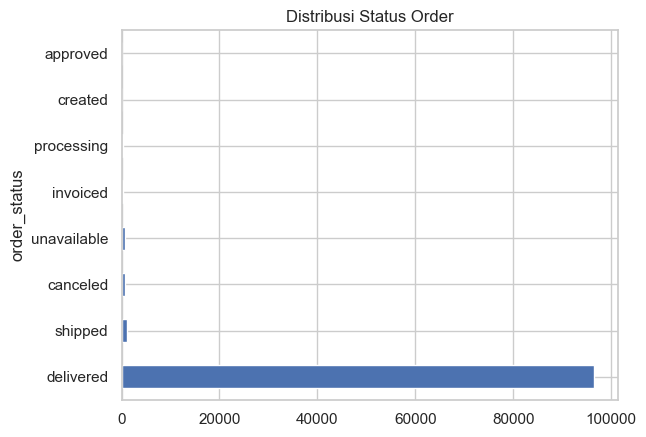

In [523]:
orders_df['order_status'].value_counts(normalize=False).plot(kind='barh', title='Distribusi Status Order')
display(orders_df['order_status'].value_counts(normalize=False))

##### f. Statistik Jumlah Order tiap Customer

In [524]:
orders_per_customer = orders_df_clean.groupby('customer_id')['order_id'].nunique()
orders_per_customer.describe()

count    96461.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: order_id, dtype: float64

##### g. Statistik Revenue tiap Customer

In [525]:
customer_revenue = order_items_df.merge(orders_df_clean, on='order_id').groupby('customer_id')['price'].sum()
customer_revenue.describe()

count    96461.000000
mean       137.040313
std        209.059760
min          0.850000
25%         45.900000
50%         86.500000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

##### h. Jumlah Repeat Order Customer

In [526]:
repeat_customers = orders_per_customer.value_counts()
display(repeat_customers)

order_id
1    96461
Name: count, dtype: int64

##### i. Durasi Pengiriman Order

<Axes: >

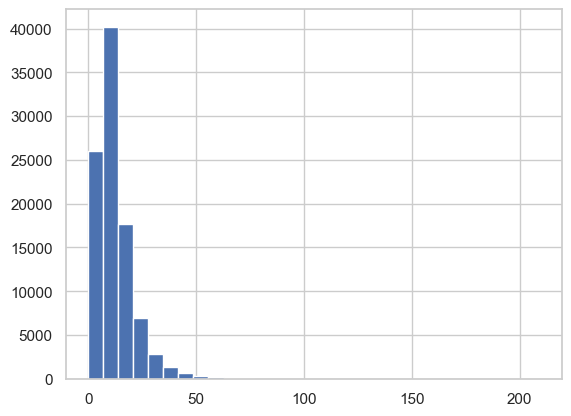

In [527]:
orders_df_clean['delivery_time'] = (pd.to_datetime(orders_df_clean['order_delivered_customer_date']) - pd.to_datetime(orders_df_clean['order_purchase_timestamp'])).dt.days
orders_df_clean['delivery_time'].hist(bins=30)

##### j. Pengiriman Order tepat waktu dan terlambat

In [528]:
orders_df_clean['late_delivery'] = pd.to_datetime(orders_df_clean['order_delivered_customer_date']) > pd.to_datetime(orders_df_clean['order_estimated_delivery_date'])
orders_df_clean['late_delivery'].value_counts(normalize=False)

late_delivery
False    88635
True      7826
Name: count, dtype: int64

##### k. Metode Pembayaran

<Axes: title={'center': 'Distribusi Metode Pembayaran'}, ylabel='payment_type'>

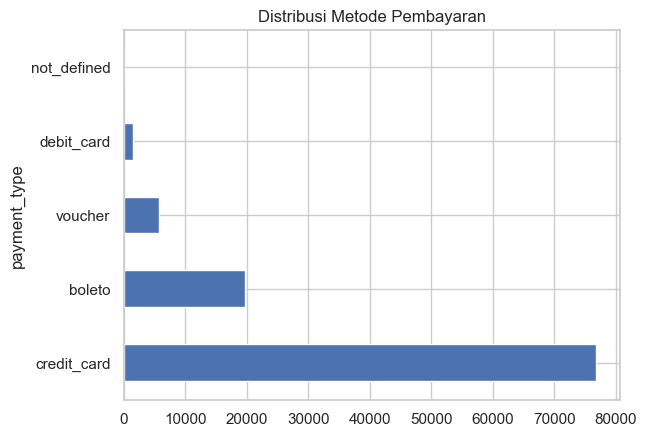

In [529]:
order_payments_df['payment_type'].value_counts().plot(kind='barh', title='Distribusi Metode Pembayaran')

##### l. Distribusi Skor Review

count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

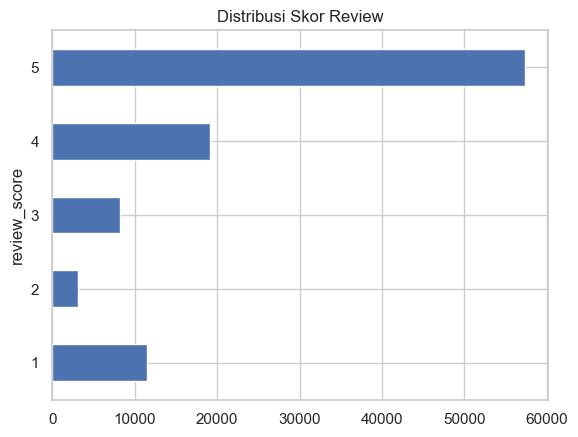

In [530]:
order_reviews_df['review_score'].value_counts().sort_index().plot(kind='barh', title='Distribusi Skor Review')
order_reviews_df['review_score'].describe()

##### m. Perbandingan review skor terhadap ketepatan waktu pengiriman

In [531]:
merged = orders_df_clean.merge(order_reviews_df, on='order_id')
pd.crosstab(merged['late_delivery'], merged['review_score'], normalize='index')

review_score,1,2,3,4,5
late_delivery,,,,,
False,0.066051,0.026330,0.079926,0.203387,0.624306
True,0.461558,0.078701,0.113766,0.123896,0.222078


,late_delivery,review_score
late_delivery,1.000000,-0.364475
review_score,-0.364475,1.000000


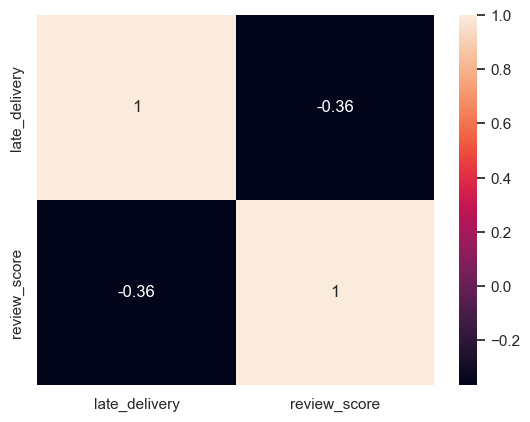

In [532]:
sns.heatmap(merged[['late_delivery', 'review_score']].corr(), annot=True)
display(merged[['late_delivery', 'review_score']].corr())

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dari waktu ke waktu? Apakah terdapat tren musiman?

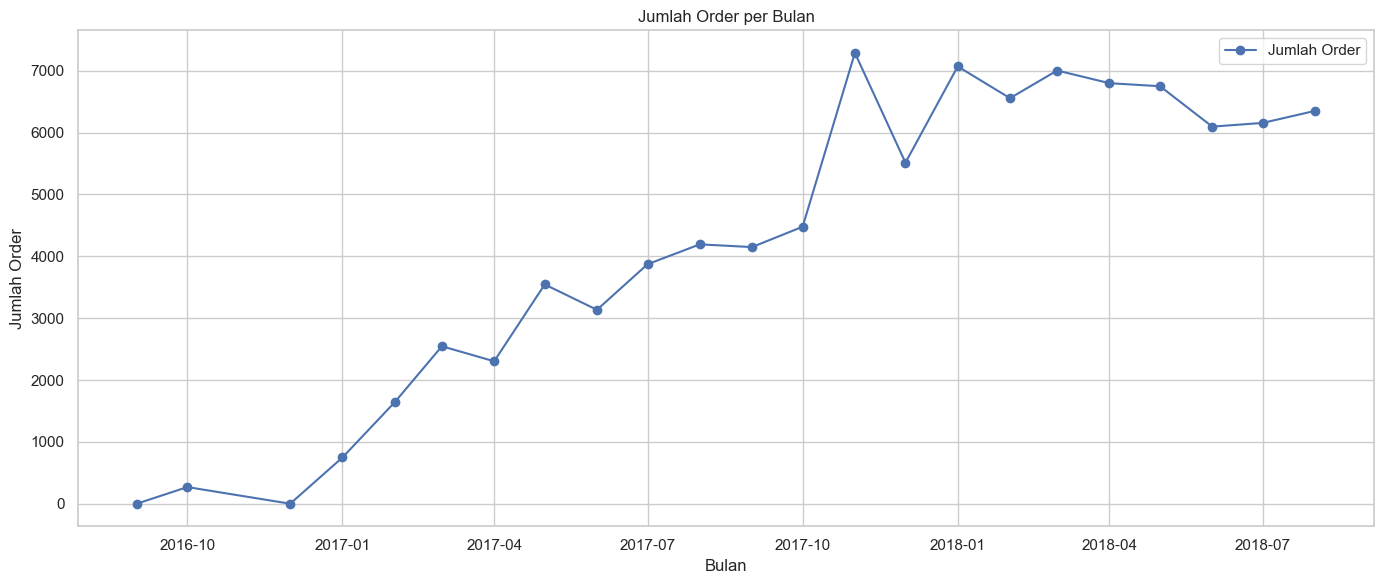

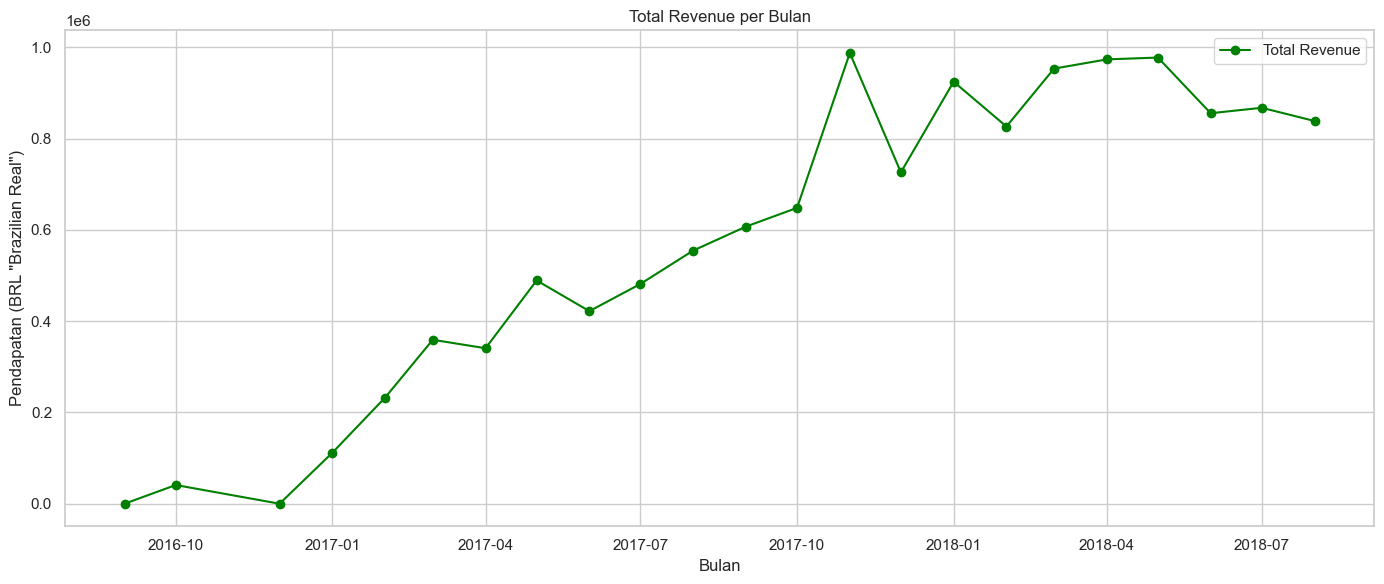

,purchase_month,total_orders,total_revenue
0,2016-09-01,1,134.97
1,2016-10-01,270,40941.30
2,2016-12-01,1,10.90
3,2017-01-01,748,111712.47
4,2017-02-01,1641,232638.86
5,2017-03-01,2546,359198.85
6,2017-04-01,2303,340669.68
7,2017-05-01,3545,489159.25
8,2017-06-01,3135,421923.37
9,2017-07-01,3872,481604.52


In [533]:
# Visualisasi jumlah order
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['purchase_month'], monthly_sales['total_orders'], marker='o', label='Jumlah Order')
plt.title('Jumlah Order per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi total pendapatan
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['purchase_month'], monthly_sales['total_revenue'], marker='o', color='green', label='Total Revenue')
plt.title('Total Revenue per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Pendapatan (BRL "Brazilian Real")')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

display(monthly_sales)

### a. Repeat vs One-time Customers
Mengetahui berapa banyak pelanggan yang hanya melakukan satu kali pembelian vs pelanggan yang melakukan pembelian berulang, untuk memahami pola perilaku konsumen.



In [534]:
# Hitung jumlah order unik per customer
orders_per_customer = orders_df_clean.groupby('customer_id')['order_id'].nunique()
orders_per_customer.name = 'num_orders'

# Hitung distribusi jumlah customer berdasarkan jumlah order
repeat_stats = orders_per_customer.value_counts().sort_index()
repeat_stats.index.name = 'jumlah_order'
repeat_stats.name = 'jumlah_customer'
print(repeat_stats)

jumlah_order
1    96461
Name: jumlah_customer, dtype: int64


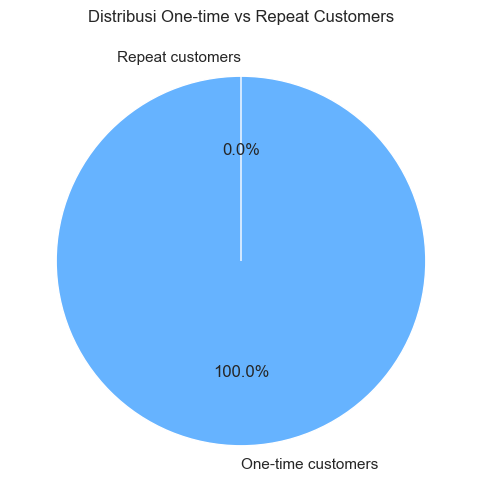

In [535]:
labels = ['One-time customers', 'Repeat customers']
sizes = [repeat_stats.get(1, 0), orders_per_customer.shape[0] - repeat_stats.get(1, 0)]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi One-time vs Repeat Customers')
plt.show()

### b. analisis pola pembelian berdasarkan waktu (Hari dan Pekan)


In [536]:
orders_df_clean['order_purchase_timestamp'] = pd.to_datetime(orders_df_clean['order_purchase_timestamp'])


orders_df_clean['order_date'] = orders_df_clean['order_purchase_timestamp'].dt.date
orders_df_clean['order_week'] = orders_df_clean['order_purchase_timestamp'].dt.to_period('W')

orders_per_day = orders_df_clean.groupby('order_date')['order_id'].nunique()
orders_per_week = orders_df_clean.groupby('order_week')['order_id'].nunique()

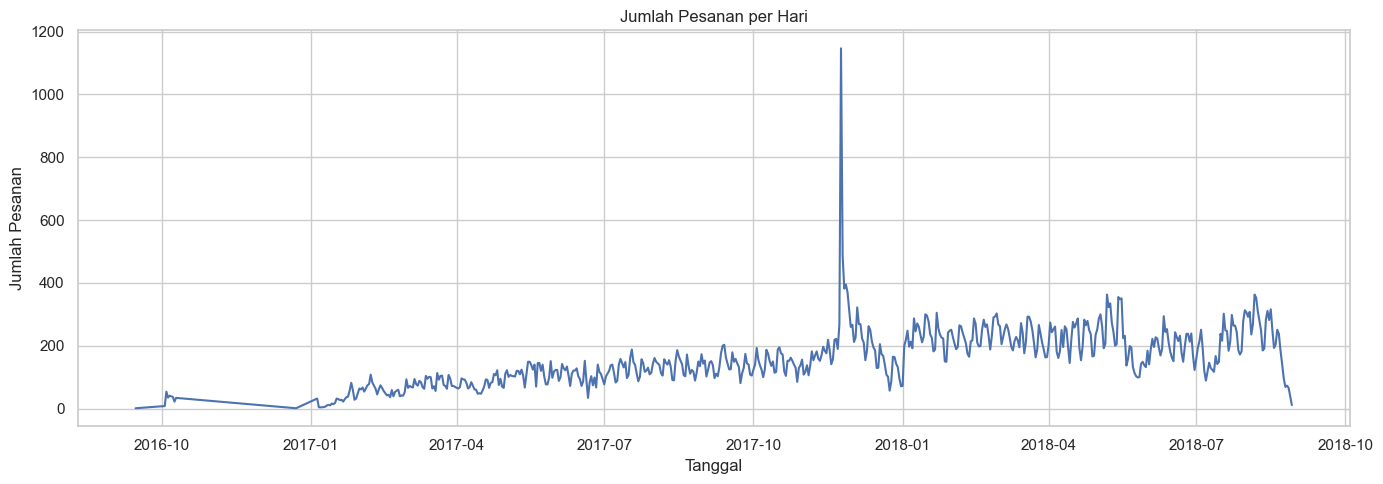

order_date
2016-09-15     1
2016-10-03     8
2016-10-04    54
2016-10-05    35
2016-10-06    41
              ..
2018-08-25    69
2018-08-26    73
2018-08-27    66
2018-08-28    39
2018-08-29    11
Name: order_id, Length: 612, dtype: int64

In [537]:
# Jumlah pesanan per Hari
plt.figure(figsize=(14, 5))
orders_per_day.plot()
plt.title('Jumlah Pesanan per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.tight_layout()
plt.show()

display(orders_per_day)

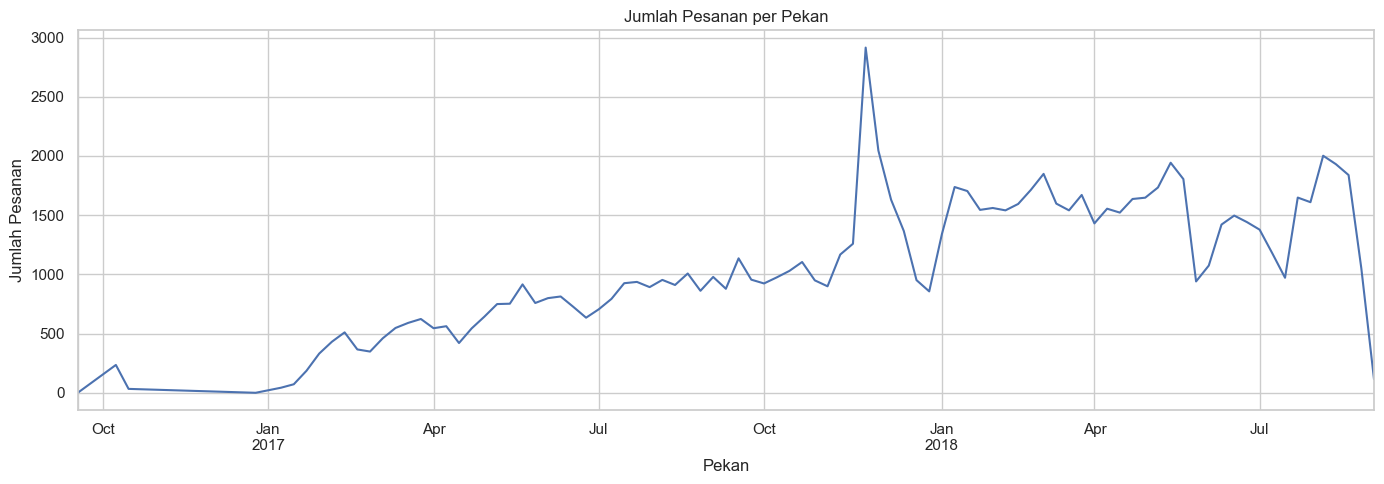

order_week
2016-09-12/2016-09-18       1
2016-10-03/2016-10-09     236
2016-10-10/2016-10-16      34
2016-12-19/2016-12-25       1
2017-01-02/2017-01-08      44
                         ... 
2018-07-30/2018-08-05    2002
2018-08-06/2018-08-12    1931
2018-08-13/2018-08-19    1839
2018-08-20/2018-08-26    1054
2018-08-27/2018-09-02     116
Freq: W-SUN, Name: order_id, Length: 91, dtype: int64

In [538]:
# Jumlah pesanan per Minggu
plt.figure(figsize=(14, 5))
orders_per_week.plot()
plt.title('Jumlah Pesanan per Pekan')
plt.xlabel('Pekan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

display(orders_per_week)

In [539]:
# Hari dengan pesanan terbanyak
max_day = orders_per_day.idxmax()
max_day_orders = orders_per_day.max()

# Pekan dengan pesanan terbanyak
max_week = orders_per_week.idxmax()
max_week_orders = orders_per_week.max()

print(f"Hari dengan order terbanyak: {max_day} ({max_day_orders} pesanan)")
print(f"Pekan dengan order terbanyak: {max_week} ({max_week_orders} pesanan)")

Hari dengan order terbanyak: 2017-11-24 (1147 pesanan)
Pekan dengan order terbanyak: 2017-11-20/2017-11-26 (2915 pesanan)


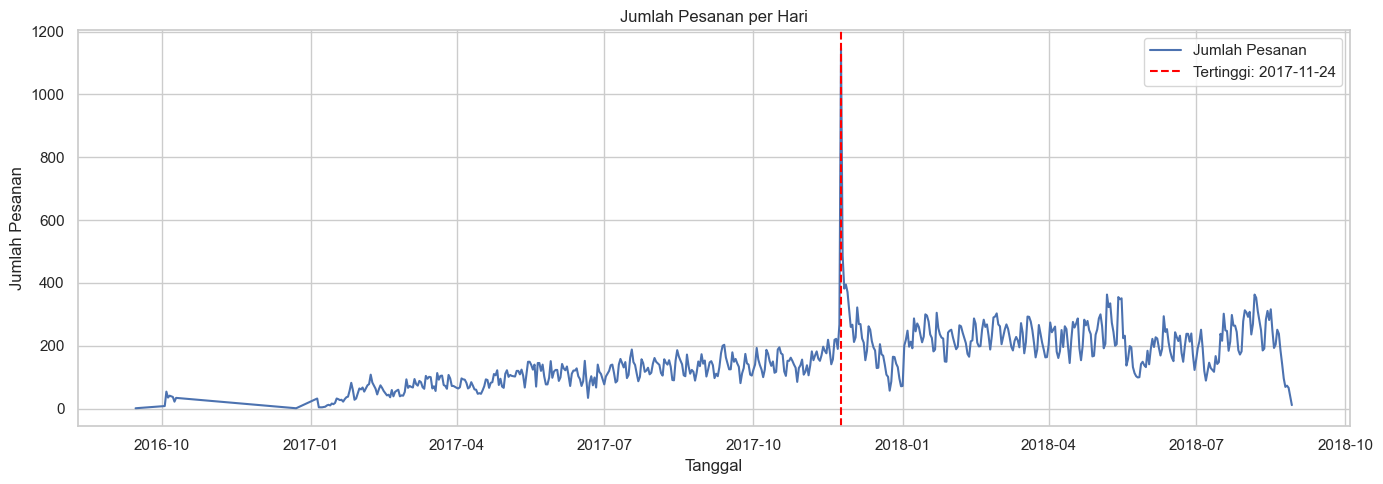

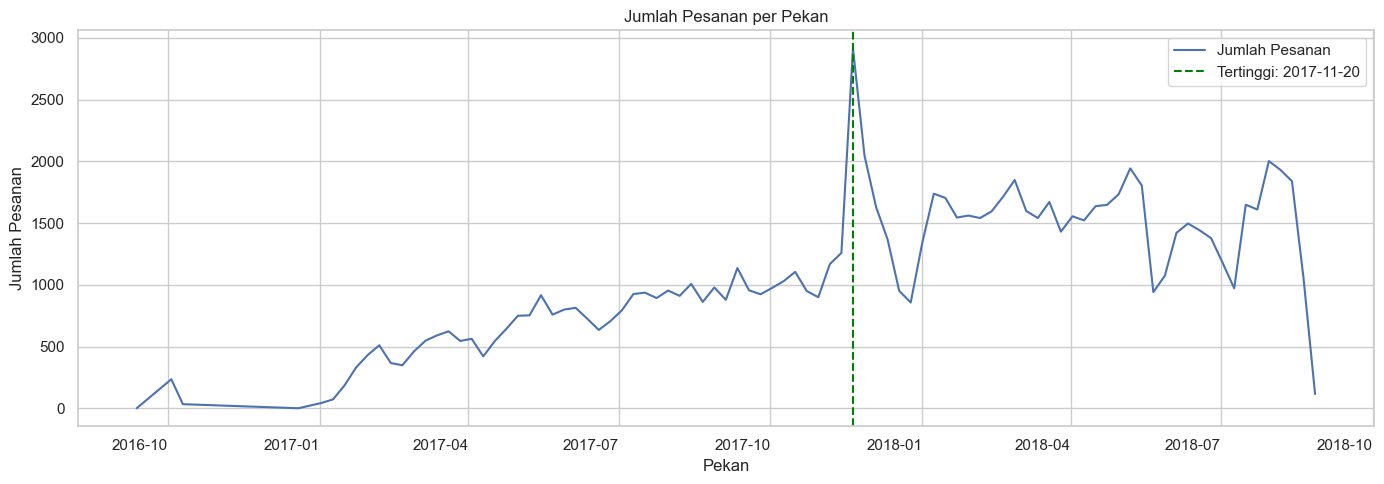

In [540]:
plt.figure(figsize=(14, 5))
orders_per_day.plot(label='Jumlah Pesanan')
plt.axvline(pd.to_datetime(max_day), color='red', linestyle='--', label=f'Tertinggi: {max_day}')
plt.title('Jumlah Pesanan per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
orders_per_week.index = orders_per_week.index.to_timestamp()  # convert Period ke Timestamp untuk plotting
orders_per_week.plot(label='Jumlah Pesanan')

plt.axvline(max_week.start_time, color='green', linestyle='--', label=f'Tertinggi: {max_week.start_time.strftime("%Y-%m-%d")}')
plt.title('Jumlah Pesanan per Pekan')
plt.xlabel('Pekan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### * 20 Hari dengan Order Terbanyak

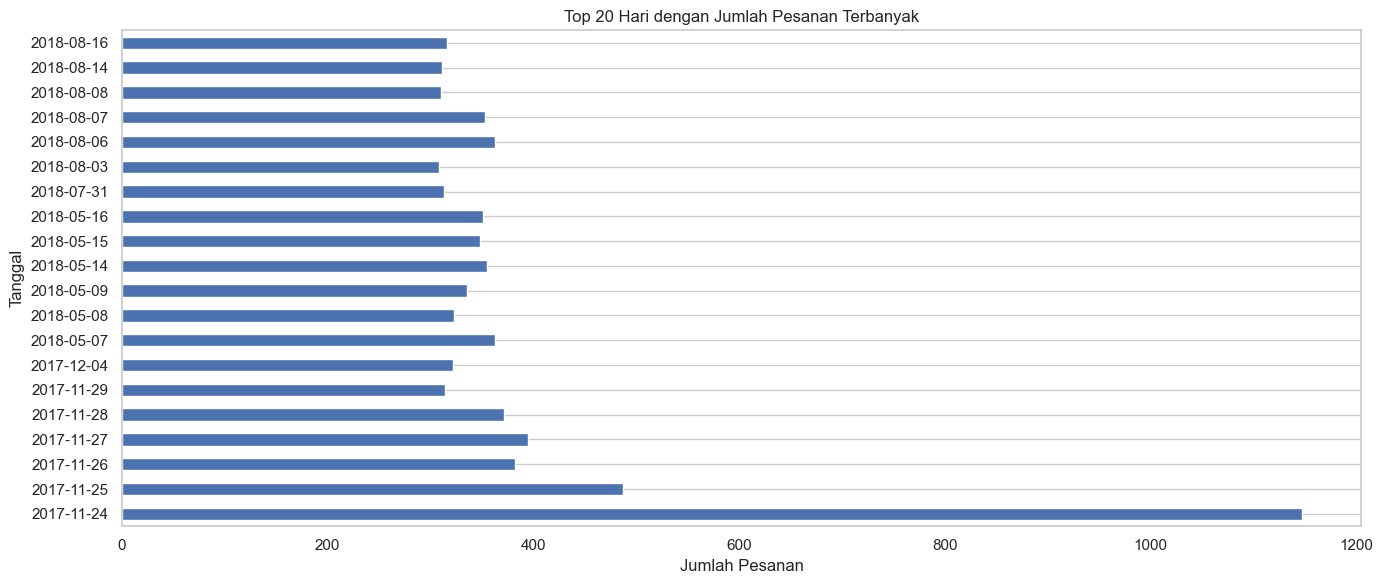

In [541]:
# Ambil 20 hari dengan pesanan terbanyak
top_20_days = orders_per_day.sort_values(ascending=False).head(20)

# Visualisasi
plt.figure(figsize=(14, 6))
top_20_days.sort_index().plot(kind='barh')
plt.title('Top 20 Hari dengan Jumlah Pesanan Terbanyak')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Tanggal')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### * Pekan dengan Order Terbanyak

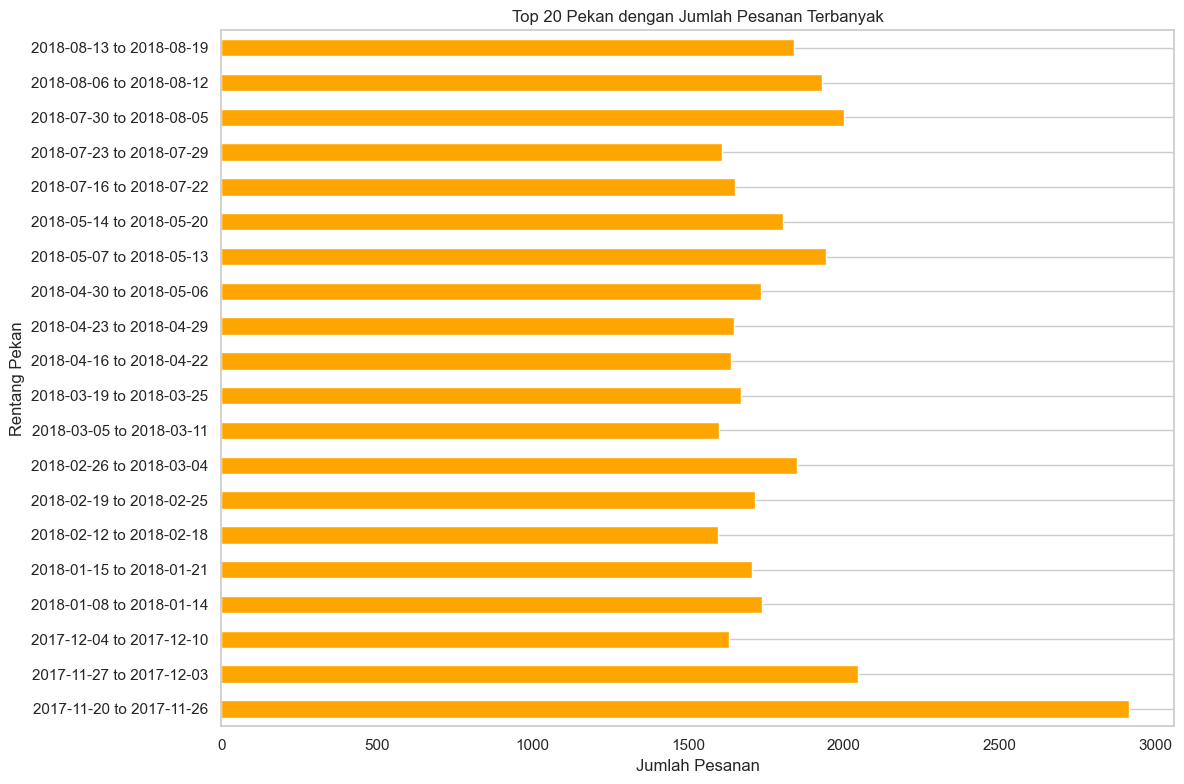

In [542]:
# Ambil 20 Pekan dengan pesanan terbanyak
top_20_weeks = orders_per_week.sort_values(ascending=False).head(20)

# Konversi ke PeriodIndex agar bisa dapat start & end
top_20_weeks_index = pd.PeriodIndex(top_20_weeks.index, freq='W')

# Ubah index menjadi string range (misalnya: 2017-11-05 to 2017-11-11)
week_ranges = [f"{p.start_time.date()} to {p.end_time.date()}" for p in top_20_weeks_index]
top_20_weeks.index = week_ranges

# Urutkan dari yang paling sedikit ke paling banyak (untuk horizontal bar)
top_20_weeks_sorted = top_20_weeks.sort_index()

# Visualisasi horizontal
plt.figure(figsize=(12, 8))
bars = top_20_weeks_sorted.plot(kind='barh', color='orange')
plt.title('Top 20 Pekan dengan Jumlah Pesanan Terbanyak')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Rentang Pekan')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana performa penjualan berdasarkan lokasi Geografis?

#### a. Penjualan berdasarkan Regional

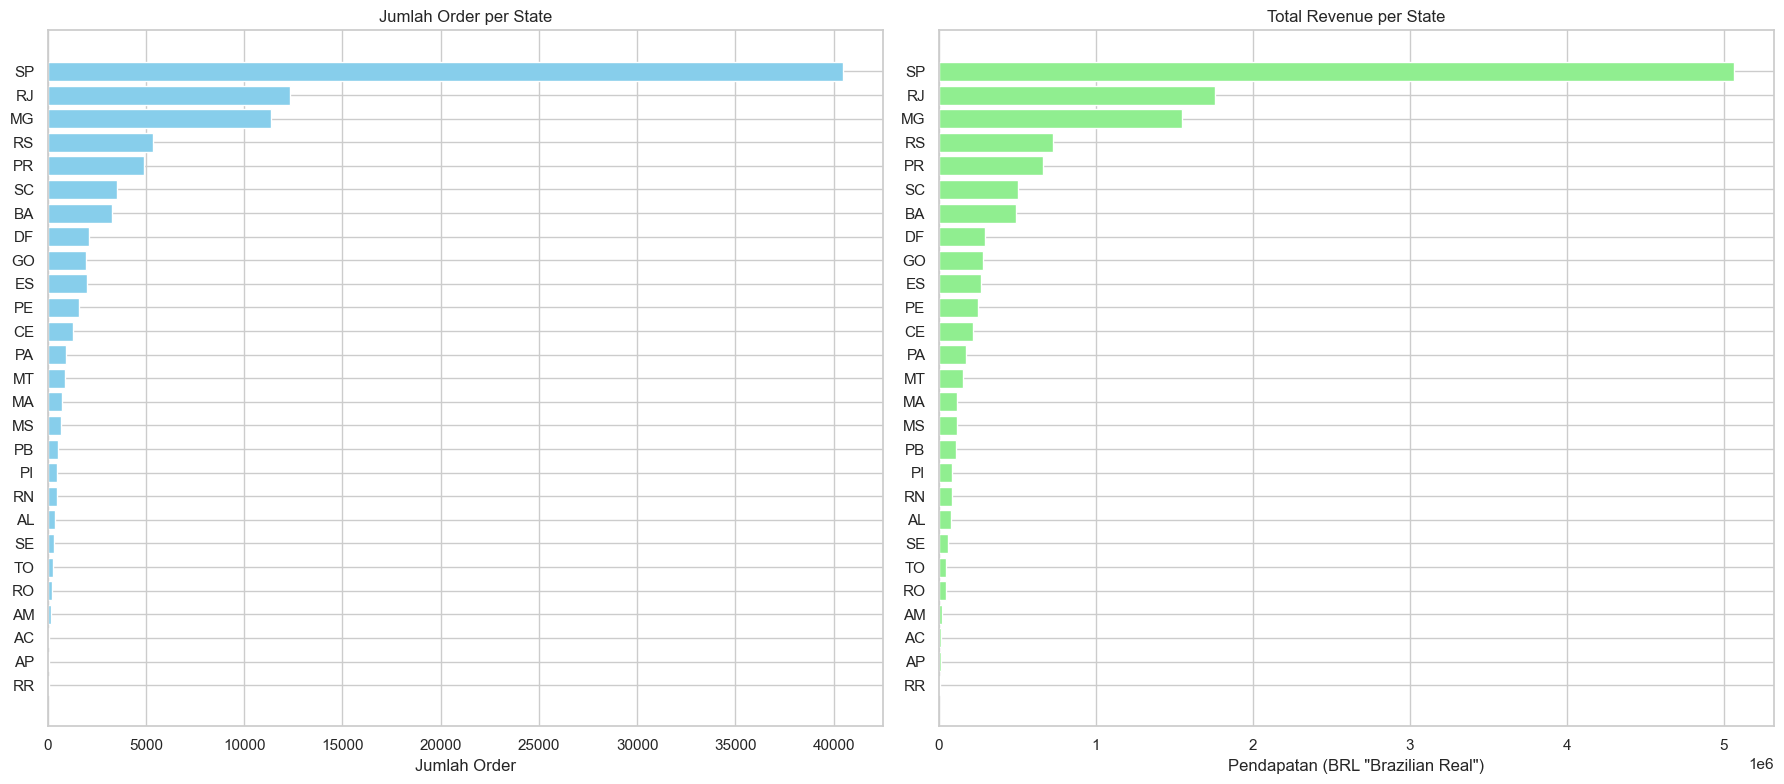

,customer_state,total_orders,total_revenue
25,SP,40489,5065915.11
18,RJ,12351,1759844.53
10,MG,11352,1552271.02
22,RS,5342,728205.48
17,PR,4923,666063.51
23,SC,3547,507147.13
4,BA,3256,493584.14
6,DF,2080,296498.41
8,GO,1957,282836.70
7,ES,1995,268643.45


In [543]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Grafik Jumlah Order per State
axes[0].barh(regional_sales['customer_state'], regional_sales['total_orders'], color='skyblue')
axes[0].set_title('Jumlah Order per State')
axes[0].set_xlabel('Jumlah Order')
axes[0].invert_yaxis()

# Grafik Total Revenue per State
axes[1].barh(regional_sales['customer_state'], regional_sales['total_revenue'], color='lightgreen')
axes[1].set_title('Total Revenue per State')
axes[1].set_xlabel('Pendapatan (BRL "Brazilian Real")')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

display(regional_sales)

#### b. Penjualan berdasarkan Kota

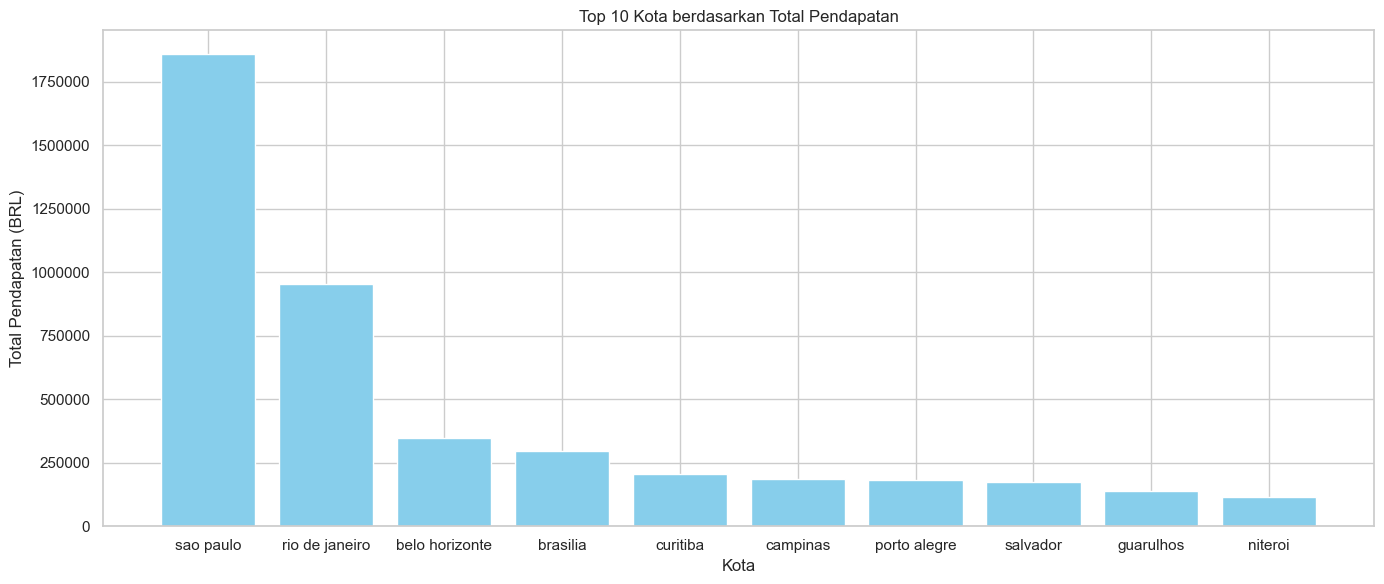

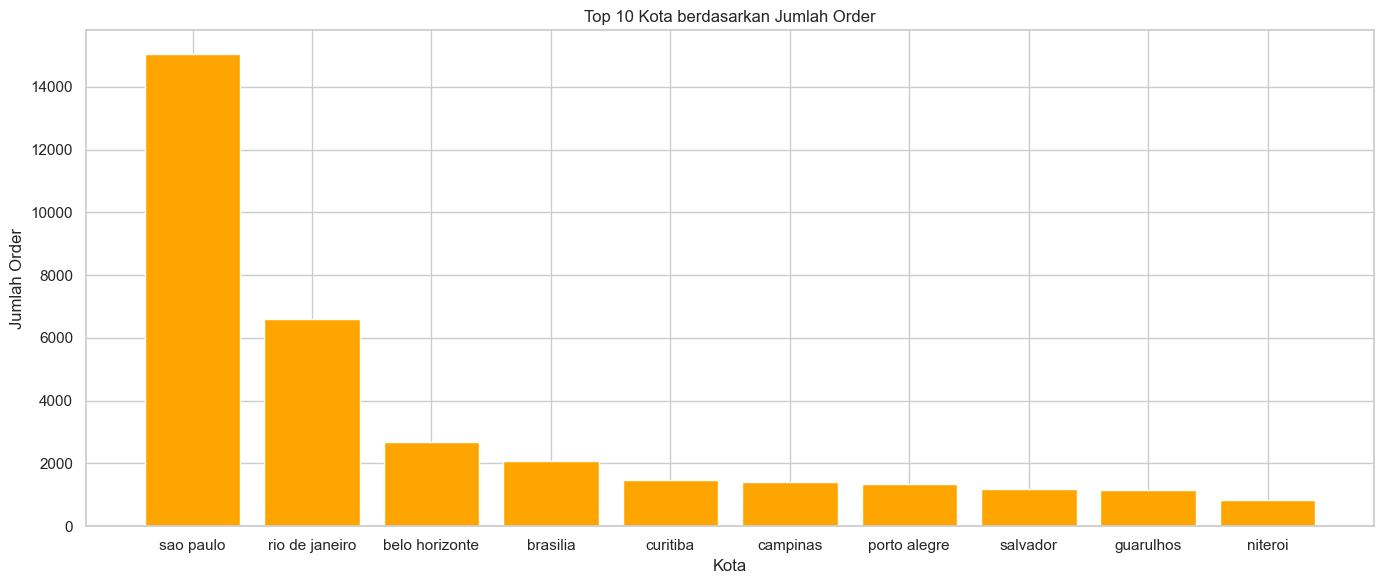

In [544]:
top_10_cities = city_performance.head(10)

plt.figure(figsize=(14, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['total_revenue'], color='skyblue')
plt.title('Top 10 Kota berdasarkan Total Pendapatan')
plt.xlabel('Kota')
plt.ylabel('Total Pendapatan (BRL)')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))
plt.bar(top_10_cities['customer_city'], top_10_cities['total_orders'], color='orange')
plt.title('Top 10 Kota berdasarkan Jumlah Order')
plt.xlabel('Kota')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### c. Peta Persebaran Lokasi Penjualan

In [545]:
# Ambil koordinat unik tiap kota
city_coords = geolocation_df.groupby('geolocation_city').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()
city_coords.rename(columns={'geolocation_city': 'customer_city'}, inplace=True)

# Gabungkan koordinat dengan performa kota
city_geo_performance = pd.merge(city_performance, city_coords, on='customer_city')

# Inisialisasi peta Brazil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Tambahkan marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Looping kota dan buat marker
for _, row in city_geo_performance.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=5 + (row['total_revenue'] / city_geo_performance['total_revenue'].max()) * 10,
        popup=(f"Kota: {row['customer_city']}<br>"
               f"Total Order: {row['total_orders']}<br>"
               f"Pendapatan: {row['total_revenue']:.2f}"),
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

m.save("city_sales_map.html")

Buka file "city_sales_map.html" menggunakan browser atau extensi "Live Preview" di VS Code

### Pertanyaan 3: Kategori produk apa yang paling laris dan menghasilkan revenue paling besar?

#### a. Kategori terlaris dan revenue paling tinggi

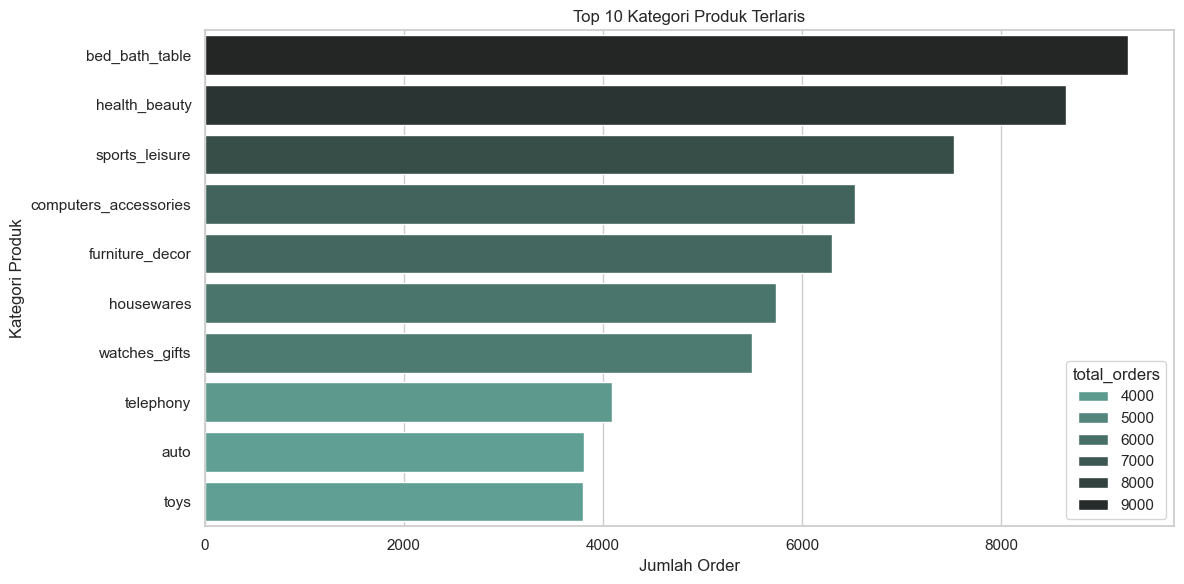

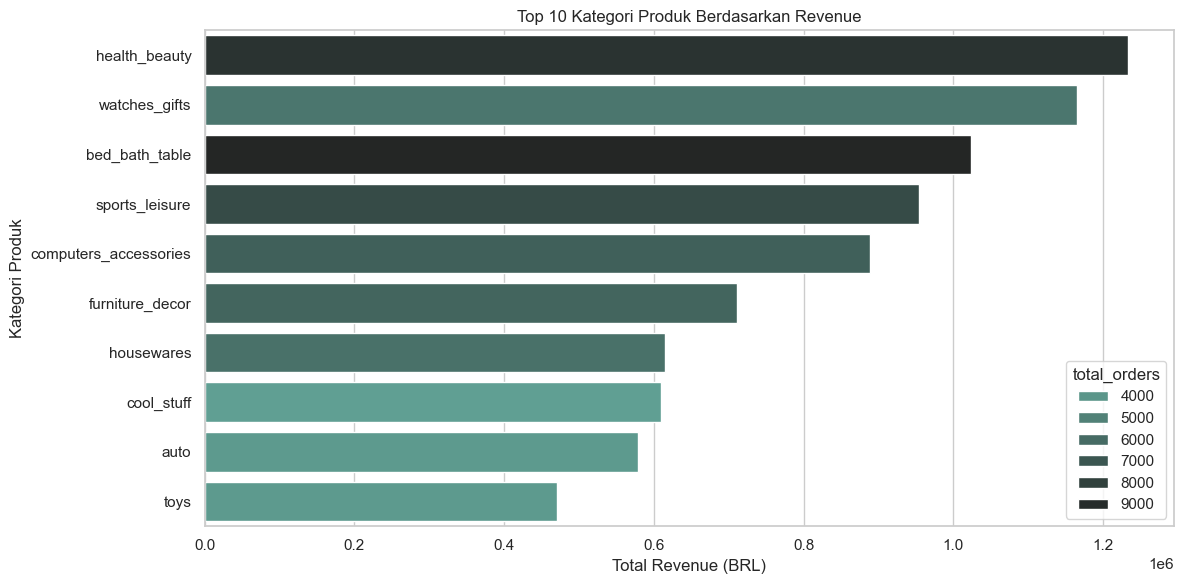

,product_category_name_english,total_orders,total_revenue
0,bed_bath_table,9271,1023300.77
1,health_beauty,8649,1233211.61
2,sports_leisure,7528,954626.07
3,computers_accessories,6529,888613.62
4,furniture_decor,6303,711493.09
5,housewares,5743,615628.69
6,watches_gifts,5493,1165898.98
7,telephony,4092,309762.23
8,auto,3809,578849.35
9,toys,3804,471197.48


,product_category_name_english,total_orders,total_revenue
1,health_beauty,8649,1233211.61
6,watches_gifts,5493,1165898.98
0,bed_bath_table,9271,1023300.77
2,sports_leisure,7528,954626.07
3,computers_accessories,6529,888613.62
4,furniture_decor,6303,711493.09
5,housewares,5743,615628.69
10,cool_stuff,3556,609964.13
8,auto,3809,578849.35
9,toys,3804,471197.48


In [546]:
# Visualisasi Kategori Terlaris & Revenue Tertinggi
plt.figure(figsize=(12,6))
sns.barplot(data=category_perf.head(10), x='total_orders', y='product_category_name_english', hue='total_orders', palette=palette)
plt.title('Top 10 Kategori Produk Terlaris')
plt.xlabel('Jumlah Order')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()

# Top 10 Kategori Berdasarkan Revenue
top_revenue = category_perf.sort_values(by='total_revenue', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_revenue, x='total_revenue', y='product_category_name_english', hue='total_orders', palette=palette)
plt.title('Top 10 Kategori Produk Berdasarkan Revenue')
plt.xlabel('Total Revenue (BRL)')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()

display(category_perf.head(10))
display(top_revenue)

#### b. Tren bulanan Kategori Produk

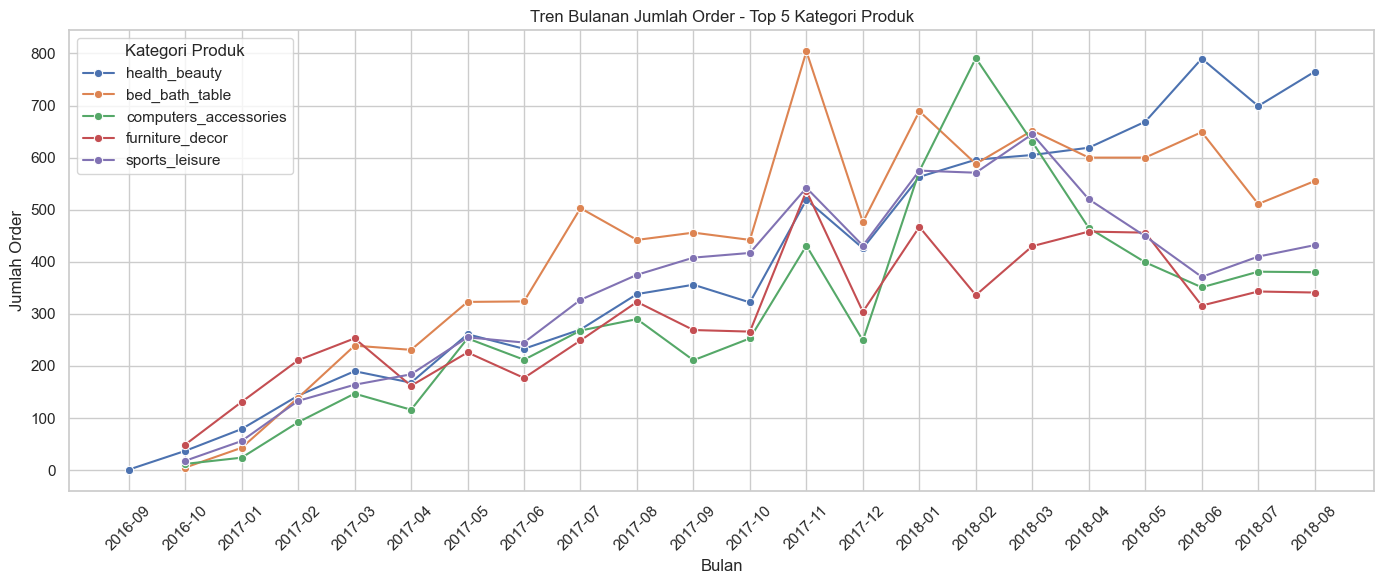

In [547]:
# Tambahkan kolom bulan
orders_df_clean['order_month'] = orders_df_clean['order_purchase_timestamp'].dt.to_period('M').astype(str)

# Gabungkan order_items dengan products dan orders (valid)
product_sales_monthly = pd.merge(order_items_df, products_df, on='product_id', how='left')
product_sales_monthly = pd.merge(product_sales_monthly, product_cat_translation_df, on='product_category_name', how='left')
product_sales_monthly = pd.merge(product_sales_monthly, orders_df_clean[['order_id', 'order_month']], on='order_id', how='inner')

# Hitung jumlah order per kategori per bulan
monthly_trend = product_sales_monthly.groupby(['order_month', 'product_category_name_english'])['order_id'].nunique().reset_index()
monthly_trend.rename(columns={'order_id': 'num_orders'}, inplace=True)

# Pilih beberapa kategori populer untuk divisualisasikan (misal: top 5)
top_categories = category_perf.head(5)['product_category_name_english'].tolist()
monthly_trend_top = monthly_trend[monthly_trend['product_category_name_english'].isin(top_categories)]

# Visualisasi tren bulanan per kategori (top 5)
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trend_top, x='order_month', y='num_orders', hue='product_category_name_english', marker='o')
plt.xticks(rotation=45)
plt.title('Tren Bulanan Jumlah Order - Top 5 Kategori Produk')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.legend(title='Kategori Produk')
plt.tight_layout()
plt.show()

**Explanatory Insight**
1. Performa Penjualan dari Waktu ke Waktu
    - Penjualan produk mengalami peningkatan yang signifikan seiring waktu, dengan puncak aktivitas pada bulan November dan Desember 2017. Hal ini terlihat dari lonjakan jumlah pesanan dan total pendapatan pada bulan-bulan tersebut. Lonjakan ini kemungkinan besar berkaitan dengan momentum akhir tahun seperti Black Friday dan Natal, yang biasa dimanfaatkan konsumen untuk berbelanja lebih banyak.
    - **Insight Bisnis:**
        - Periode akhir tahun merupakan momen penting untuk meningkatkan promosi dan kampanye pemasaran.
        - Pola ini menunjukkan adanya tren musiman yang bisa diantisipasi dan dimanfaatkan ke depannya.

2. Performa Penjualan Berdasarkan Lokasi Geografis
    - **Berdasarkan Provinsi (State):**
    Provinsi São Paulo (SP) secara konsisten mendominasi penjualan, baik dari sisi jumlah pesanan maupun total pendapatan. Provinsi-provinsi lain seperti Rio de Janeiro (RJ) dan Minas Gerais (MG) juga menunjukkan kontribusi yang besar.
        - **Insight Bisnis:**
            - Provinsi dengan populasi besar dan tingkat ekonomi yang tinggi memberikan kontribusi signifikan.
            - Strategi promosi dapat difokuskan di wilayah-wilayah ini untuk meningkatkan efisiensi biaya pemasaran.
    
    - **Berdasarkan Kota (City):**
    Kota São Paulo merupakan penyumbang terbesar dalam transaksi penjualan, diikuti oleh Rio de Janeiro, Belo Horizonte, dan Brasília. Ini menunjukkan bahwa aktivitas e-commerce paling tinggi terjadi di wilayah-wilayah urban.
        - **Insight Bisnis:**
            - Penetrasi e-commerce lebih kuat di kota-kota besar.
            - Potensi perluasan pasar bisa diarahkan ke kota besar lain dengan tingkat transaksi yang belum optimal.

3. Kategori Produk Terlaris dan Revenue Tertinggi
    - **Produk Terlaris:**
    Kategori bed_bath_table adalah yang paling banyak dibeli dengan lebih dari 9.000 pesanan, diikuti oleh kategori health_beauty, sports_leisure, dan computers_accessories.
    - **Produk dengan Revenue Tertinggi:**
    Kategori health_beauty menghasilkan pendapatan tertinggi, meskipun jumlah transaksinya tidak sebanyak bed_bath_table. Ini menunjukkan bahwa nilai transaksi rata-rata per unit di kategori ini relatif tinggi. Kategori seperti watches_gifts dan cool_stuff juga memiliki pendapatan yang besar walaupun jumlah pesanannya lebih rendah.
        - **Insight Bisnis:**
            - Produk dengan nilai tinggi perlu difokuskan dalam strategi bundling dan promosi.
            - Kategori dengan volume tinggi namun margin rendah tetap penting untuk mendorong traffic dan loyalitas pelanggan.
   

## Analisis Lanjutan (Opsional)

### a. RFM Analysis

1. Persiapan Data
menggunakan dataframe yang berisi:
    - customer_id
    - order_purchase_timestamp
    - order_id
    - payment_value (untuk monetary)

In [548]:
# Gabungkan orders dan payment
orders_payment_merged = pd.merge(orders_df_clean, order_payments_df, on='order_id')

# Ambil kolom yang relevan
rfm_df = orders_payment_merged[['customer_id', 'order_id', 'order_purchase_timestamp', 'payment_value']]

In [549]:
# Tetapkan tanggal referensi (1 hari setelah transaksi terakhir)
ref_date = rfm_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Group data untuk hitung RFM
rfm = rfm_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (ref_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                            # Frequency
    'payment_value': 'sum'                                            # Monetary
}).reset_index()

# Ubah nama kolom
rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Lihat hasil awal
rfm.head(10)

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74
1,000161a058600d5901f007fab4c27140,410,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,548,1,195.42
3,0002414f95344307404f0ace7a26f1d5,379,1,179.35
4,000379cdec625522490c315e70c7a9fb,150,1,107.01
5,0004164d20a9e969af783496f3408652,505,1,71.80
6,000419c5494106c306a97b5635748086,180,1,49.40
7,00046a560d407e99b969756e0b10f282,255,1,166.59
8,00050bf6e01e69d5c0fd612f1bcfb69c,346,1,85.23
9,000598caf2ef4117407665ac33275130,19,1,1255.71


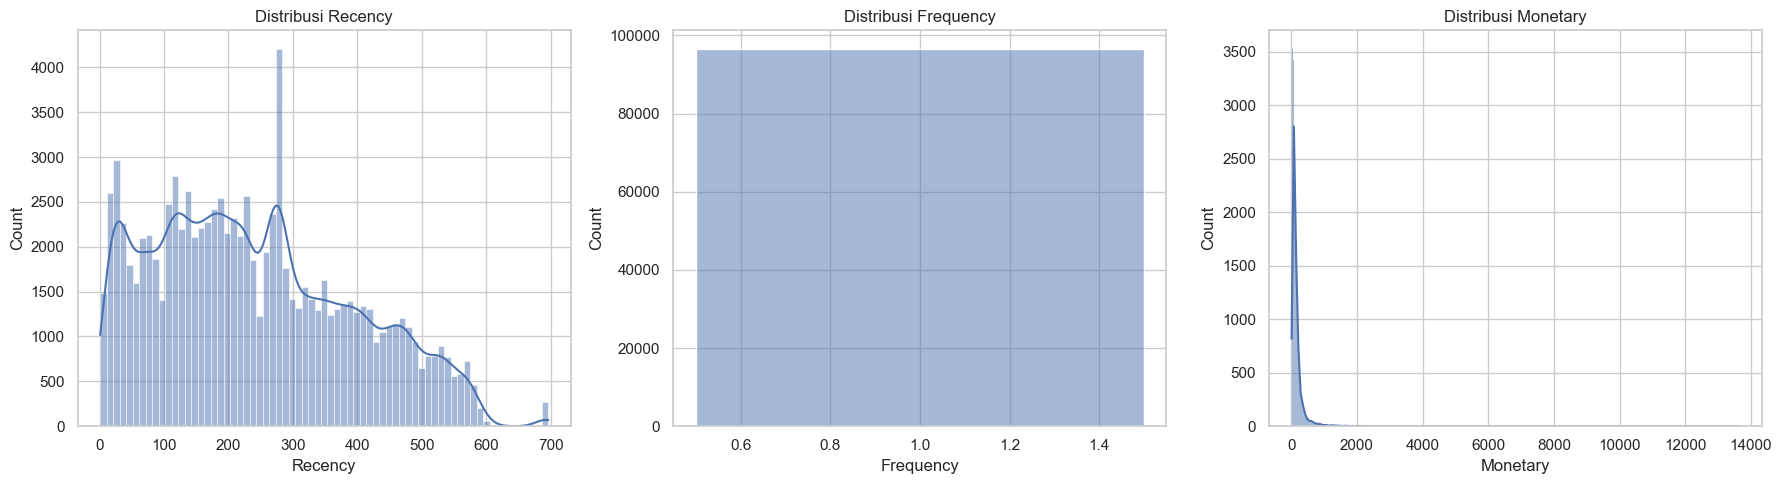

In [550]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], kde=True, ax=axs[0])
axs[0].set_title('Distribusi Recency')

sns.histplot(rfm['Frequency'], kde=True, ax=axs[1])
axs[1].set_title('Distribusi Frequency')

sns.histplot(rfm['Monetary'], kde=True, ax=axs[2])
axs[2].set_title('Distribusi Monetary')

plt.tight_layout()
plt.show()

In [551]:
# Buat skor 1-4
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Gabungkan skor jadi satu string
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

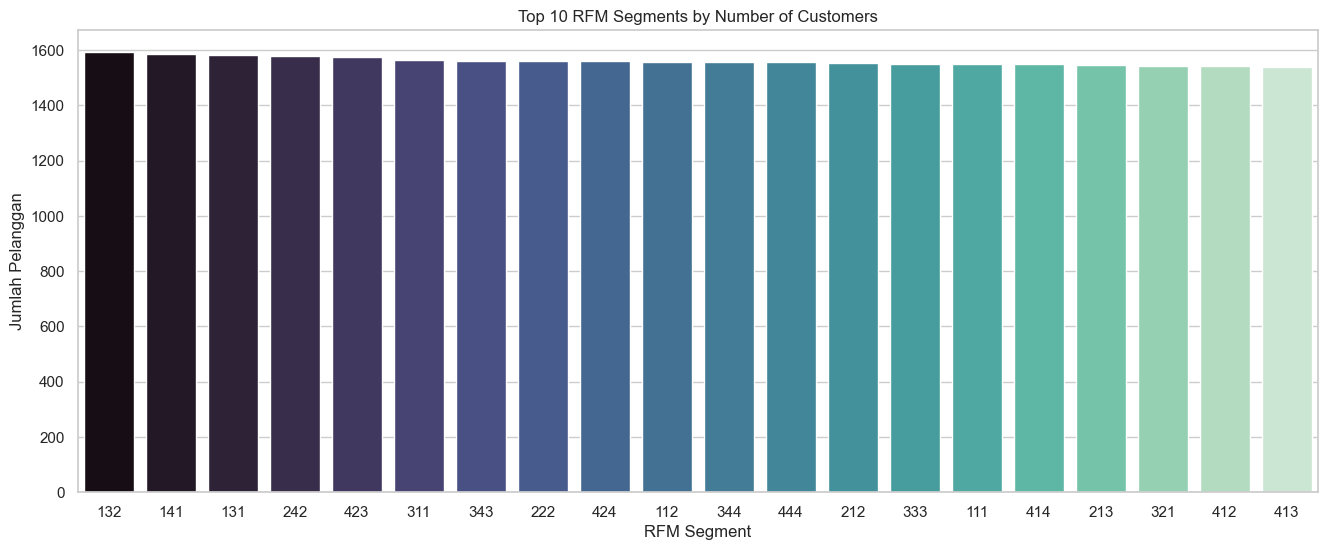

In [552]:
# Top 10 segmen RFM paling umum
top_segments = rfm['RFM_Segment'].value_counts().head(20)

plt.figure(figsize=(16,6))
sns.barplot(x=top_segments.index, y=top_segments.values, hue=top_segments.index, palette='mako', legend=False)
plt.title('Top 10 RFM Segments by Number of Customers')
plt.xlabel('RFM Segment')
plt.ylabel('Jumlah Pelanggan')
plt.show()

In [553]:
display(top_segments.head())

RFM_Segment
132    1592
141    1586
131    1582
242    1577
423    1576
Name: count, dtype: int64

In [554]:
display(rfm)

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74,2,1,3,213
1,000161a058600d5901f007fab4c27140,410,1,67.41,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,548,1,195.42,1,1,4,114
3,0002414f95344307404f0ace7a26f1d5,379,1,179.35,1,1,4,114
4,000379cdec625522490c315e70c7a9fb,150,1,107.01,3,1,3,313
...,...,...,...,...,...,...,...,...
96455,fffcb937e9dd47a13f05ecb8290f4d3e,166,1,91.91,3,4,2,342
96456,fffecc9f79fd8c764f843e9951b11341,153,1,81.36,3,4,2,342
96457,fffeda5b6d849fbd39689bb92087f431,100,1,63.13,4,4,2,442
96458,ffff42319e9b2d713724ae527742af25,77,1,214.13,4,4,4,444


In [555]:
# Menambahkan kolom RFM_Label berdasarkan segmen RFM
def assign_rfm_label(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    
    if r >= 3 and f >= 3 and m >= 3:
        return 'Champions'
    elif r >= 3 and f >= 2:
        return 'Potential Loyalists'
    elif r == 1 and f <= 2:
        return 'At Risk'
    elif r == 1 and f == 1:
        return 'Lost'
    elif r <= 2 and f >= 3:
        return 'Can’t Lose Them'
    elif r == 4 and f == 1:
        return 'New Customers'
    else:
        return 'Others'

# Menambahkan kolom RFM_Label pada dataframe
rfm['RFM_Label'] = rfm.apply(assign_rfm_label, axis=1)

# Memeriksa hasil
print(rfm[['customer_id', 'R_Score', 'F_Score', 'M_Score', 'RFM_Label']].head())

                        customer_id R_Score F_Score M_Score RFM_Label
0  00012a2ce6f8dcda20d059ce98491703       2       1       3    Others
1  000161a058600d5901f007fab4c27140       1       1       2   At Risk
2  0001fd6190edaaf884bcaf3d49edf079       1       1       4   At Risk
3  0002414f95344307404f0ace7a26f1d5       1       1       4   At Risk
4  000379cdec625522490c315e70c7a9fb       3       1       3    Others


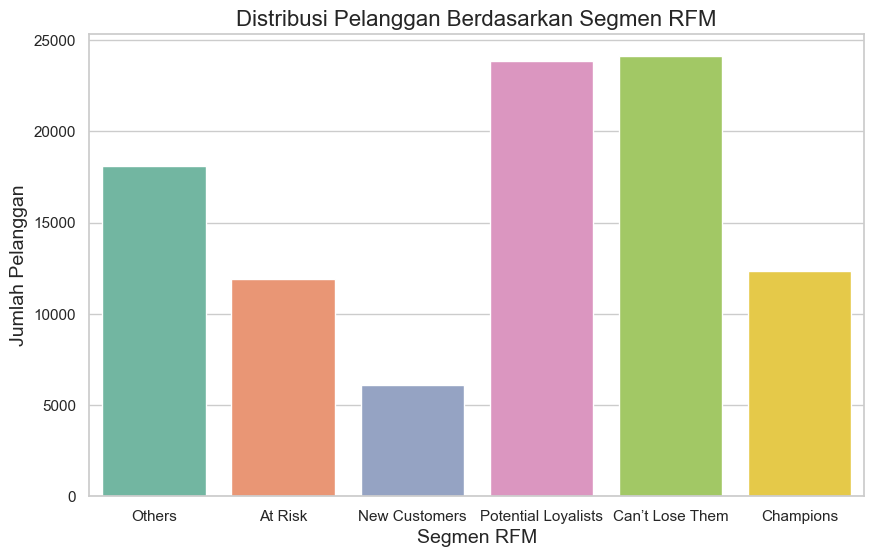

In [556]:
# Visualisasi distribusi segmen pelanggan
plt.figure(figsize=(10,6))
sns.countplot(x='RFM_Label', data=rfm,hue= 'RFM_Label',  palette='Set2')
plt.title('Distribusi Pelanggan Berdasarkan Segmen RFM', fontsize=16)
plt.xlabel('Segmen RFM', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [557]:
display(rfm)

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74,2,1,3,213,Others
1,000161a058600d5901f007fab4c27140,410,1,67.41,1,1,2,112,At Risk
2,0001fd6190edaaf884bcaf3d49edf079,548,1,195.42,1,1,4,114,At Risk
3,0002414f95344307404f0ace7a26f1d5,379,1,179.35,1,1,4,114,At Risk
4,000379cdec625522490c315e70c7a9fb,150,1,107.01,3,1,3,313,Others
...,...,...,...,...,...,...,...,...,...
96455,fffcb937e9dd47a13f05ecb8290f4d3e,166,1,91.91,3,4,2,342,Potential Loyalists
96456,fffecc9f79fd8c764f843e9951b11341,153,1,81.36,3,4,2,342,Potential Loyalists
96457,fffeda5b6d849fbd39689bb92087f431,100,1,63.13,4,4,2,442,Potential Loyalists
96458,ffff42319e9b2d713724ae527742af25,77,1,214.13,4,4,4,444,Champions


#### **Interpretasi Hasil RFM**
Mengidentifikasi karakteristik pelanggan berdasarkan perilaku mereka agar bisa menentukan strategi pemasaran yang lebih tepat sasaran.
**Penjelasan Scoring:**
- Angka Pertama = Recency Score (R)
- Angka Kedua = Frequency Score (F)
- Angka Kedua = Monetary Score (M)

1. Recency Score:
    - Skor 4 = pelanggan baru saja melakukan pembelian (loyal dan aktif).
    - Skor 1 = sudah lama tidak melakukan transaksi (mungkin hampir churn).
2. Frequency Score:
    - Skor 4 = pelanggan sering bertransaksi → potensial untuk loyal customer.
    - Skor 1 = pelanggan jarang belanja → bisa dijadikan target promosi.
3. Monetary Score:
    - Skor 4 = pelanggan dengan pengeluaran besar (VIP customer).
    - Skor 1 = pelanggan dengan pengeluaran rendah.

**Penjelasan Hasil RFM Analysis**
- **Segmen:**
    - **Champions:** Pelanggan terbaik. Harus dijaga dan diberi perlakuan spesial.
    - **Potential Loyalists:** Peluang besar untuk dijadikan pelanggan setia. Fokus pada retensi.
    - **At Risk:** Mulai tidak aktif. Harus ditarik kembali dengan strategi win-back.
    - **New Customers:** Masih baru. Perlu onboarding dan pengalaman pertama yang positif.
    - **Can’t Lose Them:** Sangat penting. Mereka sering belanja tapi mulai jarang kembali. Perlu penanganan cepat.
    - **Other:** Pelanggan dengan pola pembelian kurang konsisten. Butuh pendekatan umum atau edukatif.

### b. Clustering

In [558]:
# Pastikan kolom skor sudah dalam bentuk numerik
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Hitung total skor RFM
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

In [559]:
# Contoh: Binning manual berdasarkan score rfm
def assign_segment(score):
    if score <= 10:
        return 'At Risk'
    elif score <= 12:
        return 'Potential Loyalist'
    elif score <= 14:
        return 'Loyal Customer'
    else:
        return 'Champion'

# Terapkan fungsi segmentasi
rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)

In [560]:
display(rfm)

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Label,RFM_Score,Segment
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74,2,1,3,213,Others,6,At Risk
1,000161a058600d5901f007fab4c27140,410,1,67.41,1,1,2,112,At Risk,4,At Risk
2,0001fd6190edaaf884bcaf3d49edf079,548,1,195.42,1,1,4,114,At Risk,6,At Risk
3,0002414f95344307404f0ace7a26f1d5,379,1,179.35,1,1,4,114,At Risk,6,At Risk
4,000379cdec625522490c315e70c7a9fb,150,1,107.01,3,1,3,313,Others,7,At Risk
...,...,...,...,...,...,...,...,...,...,...,...
96455,fffcb937e9dd47a13f05ecb8290f4d3e,166,1,91.91,3,4,2,342,Potential Loyalists,9,At Risk
96456,fffecc9f79fd8c764f843e9951b11341,153,1,81.36,3,4,2,342,Potential Loyalists,9,At Risk
96457,fffeda5b6d849fbd39689bb92087f431,100,1,63.13,4,4,2,442,Potential Loyalists,10,At Risk
96458,ffff42319e9b2d713724ae527742af25,77,1,214.13,4,4,4,444,Champions,12,Potential Loyalist


In [561]:
rfm.to_csv('segmentasi_rfm_manual.csv', index=False)

## Conclusion

1.  Conclution pertanyaan 1: Bagaimana performa penjualan dari waktu ke waktu? Apakah terdapat tren musiman?
    - Tren penjualan menunjukkan pola naik-turun yang berkorelasi dengan waktu tertentu, terutama pada bulan-bulan tertentu terjadi lonjakan penjualan. Hal ini mengindikasikan adanya tren musiman.
    - Misalnya, lonjakan signifikan mungkin terjadi pada kuartal akhir (Q4) yang bisa dikaitkan dengan musim liburan, promosi akhir tahun, atau perayaan nasional.
    -  Sebaliknya, terdapat bulan-bulan dengan penurunan penjualan, yang bisa menjadi fokus untuk strategi promosi atau penyesuaian stok.
    - **Insight Bisnis:** Perusahaan dapat mengoptimalkan kampanye marketing, stok produk, dan tenaga penjual di bulan-bulan dengan potensi lonjakan permintaan. Sebaliknya, strategi retensi pelanggan atau diskon bisa difokuskan di periode low season.
2.  Conclution pertanyaan 2: Kategori produk apa yang paling laris dan menghasilkan revenue paling besar?
    - Beberapa kategori memiliki frekuensi penjualan tinggi namun tidak selalu menghasilkan revenue besar, artinya harganya mungkin rendah atau banyak diskon.
    - Kategori tertentu (misalnya kategori Bed Bath Table) walaupun penjualannya paling tinggi, namun kategori Health and Beauty memberikan kontribusi revenue yang lebih besar.
    - Dengan menggabungkan total quantity dan total revenue per kategori, terlihat bahwa kategori Bed Bath Table menjadi produk paling laris, sementara kategori Health and Beauty menjadi penyumbang revenue tertinggi.
    - **Insight Bisnis:** Fokus pada upselling atau bundling produk bernilai tinggi dari kategori dengan revenue besar.
3.  Conclution Segmentasi Pelanggan (RFM Analysis)
    - Terdapat segmen Champions dan Potential Loyalists yang harus dijaga loyalitasnya.
    - Segmen At Risk dan Can’t Lose Them perlu perhatian lebih untuk mengembalikan keterlibatan mereka, seperti dengan promo eksklusif atau penawaran khusus.

**Kesimpulan**
Perusahaan memiliki peluang besar untuk meningkatkan revenue dengan strategi berbasis waktu (musiman) dan fokus pada kategori produk unggulan. Analisis segmentasi RFM menunjukkan bahwa strategi retensi pelanggan dan personalisasi marketing akan memberikan dampak besar terhadap keberlanjutan bisnis.